In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import pickle
%matplotlib inline 
import datetime

plt.rcParams["figure.figsize"] = (12,12) 

from sklearn import model_selection
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import preprocessing 
from sklearn.svm import LinearSVC, SVC
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

import importlib

import finalproj as fp

In [2]:
features_train = pd.read_csv('features_train.csv', header=None).values
labels_train = pd.read_csv('labels_train.csv', header=None).values.ravel()
features_train.shape, labels_train.shape

((8640, 2048), (8640,))

In [3]:
def output_error_and_cm_for_classifier(fit_model, y_actual, y_pred, unique_labels=np.unique(labels_train)):
    print("Misclassification error: {}.".format(1 - accuracy_score(y_actual, y_pred)))
    fp.plot_multiclass_confusion_matrix(confusion_matrix(y_actual, y_pred), np.unique(labels_train), show_annot=False)

In [4]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(features_train, labels_train, test_size=0.1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7776, 2048), (864, 2048), (7776,), (864,))

In [5]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
pca_64 = PCA(n_components=64).fit(X_train_scaled)
pca_256 = PCA(n_components=256).fit(X_train_scaled)
X_train_pca_64 = pca_64.transform(X_train_scaled)
X_train_pca_256 = pca_256.transform(X_train_scaled)
X_test_pca_64 = pca_64.transform(X_test_scaled)
X_test_pca_256 = pca_256.transform(X_test_scaled)

In [35]:
clf = SVC(kernel='poly', degree=3)

In [36]:
%time clf.fit(X_train_pca_64, y_train)

CPU times: user 5.83 s, sys: 51.2 ms, total: 5.88 s
Wall time: 5.93 s


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [37]:
y_pred = clf.predict(X_test_pca_64)
y_pred.shape

(864,)

Misclassification error: 0.08333333333333337.


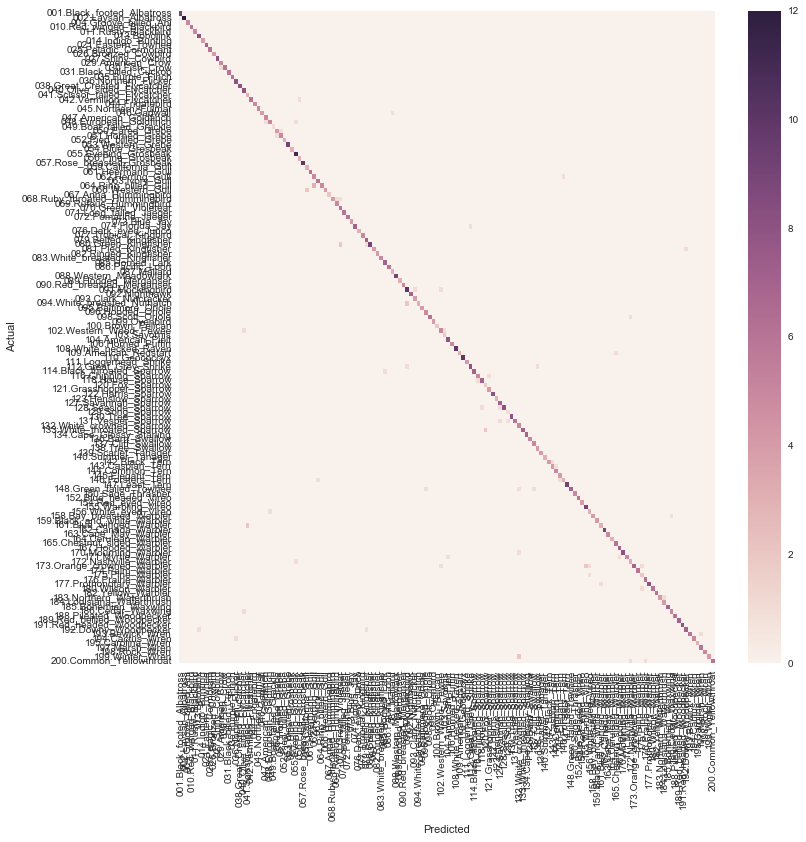

In [38]:
output_error_and_cm_for_classifier(clf, y_test, y_pred)

In [9]:
open('test.txt','w').write(classification_report(y_test, y_pred))

10368

# Test data

In [38]:
features_test = pd.read_csv('features_test.csv', header=None).values
labels_test = pd.read_csv('labels_test.csv', header=None).values.ravel()
features_test.shape, labels_test.shape

((4320, 2048), (4320,))

In [26]:
clf_all = LinearSVC(C=1.0, loss='squared_hinge', penalty='l2', multi_class='ovr')
%time clf_all.fit(features_train, labels_train)

CPU times: user 2min 33s, sys: 1.67 s, total: 2min 35s
Wall time: 2min 42s


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [27]:
test_pred = clf_all.predict(features_test)
test_pred.shape

(4320,)

In [28]:
test_results_for_output = pd.DataFrame({
    'Id': pd.Series(labels_test).astype(int), # use labels as they go 1, 10, 100, etc.
    'Prediction': pd.Series(test_pred).apply(lambda pred: pred.split('.')[0].lstrip('0'))
})
test_results_for_output.shape

(4320, 2)

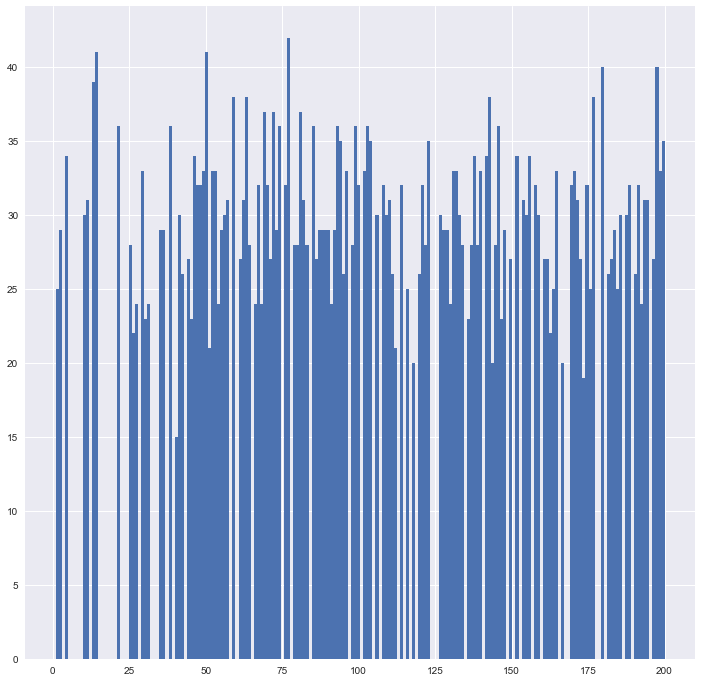

In [29]:
test_results_for_output['Prediction'].astype(int).hist(bins=200)

In [30]:
len(set(labels_train)), len(test_results_for_output['Prediction'].unique())

(144, 144)

In [31]:
# Kaggle site code may not care about order, only id value, but sort by id just in case
test_results_for_output.sort_values('Id', inplace=True)  
test_results_for_output[:3]

,Id,Prediction
0,1,50
1111,2,128
2222,3,69


In [37]:
filename = 'test_simple_linearsvc_from_ipynb_mirrored'
test_results_for_output.to_csv('{}.csv'.format(filename), index=False)
pickle.dump(clf_all, open('{}_model.pickle'.format(filename), 'wb'))

In [95]:
"{0:.1%}".format(.2734)

'27.3%'

In [35]:
print("Starting model fit at {}".format(datetime.datetime.now()))

Starting model fit at 2017-06-01 17:48:17.890685


In [52]:
time1 = datetime.datetime.now()

In [53]:
time2 = datetime.datetime.now()

In [54]:
time2 - time1

datetime.timedelta(0, 6, 46034)

In [76]:
"{:%Y%m%d-%H%M%S}".format(datetime.datetime.now())

'20170601-182802'

In [56]:
type(time2-time1)

datetime.timedelta

In [57]:
foo = time2-time1
bar = datetime.time(0, 0, foo.seconds)
bar

datetime.time(0, 0, 6)

In [58]:
bar

datetime.time(0, 0, 6)

In [59]:
datetime.time(0, 0, foo.seconds).strftime("%M:%S")

'00:06'

In [65]:
datetime.time(0, 0, (time2 - time1).seconds).strftime("%H:%M:%S")

'00:00:06'

In [67]:
m = [{'Desc': 'foo', 'Accuracy': 0.27, 'Train time': 5, 'Overall time': 6},
     {'Desc': 'bar', 'Accuracy': 0.25, 'Train time': 1, 'Overall time': 6},
     {'Desc': 'baz', 'Accuracy': 0.23, 'Train time': 2, 'Overall time': 6}]

In [70]:
pd.DataFrame(m, columns=['Desc','Accuracy','Overall time','Train time'])

,Desc,Accuracy,Overall time,Train time
0,foo,0.27,6,5
1,bar,0.25,6,1
2,baz,0.23,6,2


In [79]:
foo = datetime.timedelta(hours = 1, minutes = 27, seconds = 2)
foo

datetime.timedelta(0, 5222)

In [80]:
datetime.time(0, 0, foo.seconds).strftime("%H:%M:%S")

ValueError: second must be in 0..59

In [81]:
pd.Timedelta(foo)

Timedelta('0 days 01:27:02')

In [82]:
def strfdelta(tdelta, string_to_format):
    d = {"days": tdelta.days}
    d["hours"], rem = divmod(tdelta.seconds, 3600)
    d["minutes"], d["seconds"] = divmod(rem, 60)
    return string_to_format.format(**d)

In [90]:
strfdelta(foo, "{hours:02d}:{minutes:02d}:{seconds:02d}")

'01:27:02'

In [91]:
def get_formatted_time_difference(start_time, end_time):
    return strfdelta((end_time - start_time), "{hours:02d}:{minutes:02d}:{seconds:02d}")

In [92]:
get_formatted_time_difference(time1, time2)

'00:00:06'

In [98]:
'MyLogisticRegression-C=1-max_iter=100-OvR-PCA_256-20170602-134355-model.pickle'.rstrip('-model.pickle')

'MyLogisticRegression-C=1-max_iter=100-OvR-PCA_256-20170602-134355'